# Project - Global Shark Attacks

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import os

## Importing and encoding the dataset

In [185]:
pwd

'/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project'

In [186]:
attacks = pd.read_csv("/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/input/attacks.csv",encoding='latin1')

In [187]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring the dataset general info

In [188]:
attacks.shape

(25723, 24)

### Exploring the dataset missing values info


In [189]:
#checking missing values per column
Nan_attacks= attacks.isna().sum()
missing_value_attack = pd.DataFrame({'Feature': attacks.columns,
                                 'Missing values': Nan_attacks})
missing_value_attack

,Feature,Missing values
Case Number,Case Number,17021
Date,Date,19421
Year,Year,19423
Type,Type,19425
Country,Country,19471
Area,Area,19876
Location,Location,19961
Activity,Activity,19965
Name,Name,19631
Sex,Sex,19986


In [190]:
#checking missing values percentages
percent_missing = attacks.isnull().sum() * 100 / len(attacks)
percent_missing
Nan_attack_percentage = pd.DataFrame({'Feature': attacks.columns,
                                 'Missing %': percent_missing})
Nan_attack_percentage 

,Feature,Missing %
Case Number,Case Number,66.170353
Date,Date,75.500525
Year,Year,75.508300
Type,Type,75.516075
Country,Country,75.694903
Area,Area,77.269370
Location,Location,77.599813
Activity,Activity,77.615364
Name,Name,76.316915
Sex,Sex,77.697003


In [191]:
#deleting columns with 100% missing values
attacks.pop("Unnamed: 22")
attacks.pop("Unnamed: 23")


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
25718    NaN
25719    NaN
25720    NaN
25721    NaN
25722    NaN
Name: Unnamed: 23, Length: 25723, dtype: object

In [192]:
attacks.shape

(25723, 22)

###  Deleting ignorable missing values

In [193]:
#poping missing values having age
attacks.dropna(subset=['Age'], inplace = True)

In [194]:
#dataframe updated after ignorable NaN deletion
attacks.shape

(3471, 22)

In [195]:
#checking updated missing values percentages after poping Unnamed:22 and :23
percent_missing = attacks.isnull().sum() * 100 / len(attacks)
percent_missing
Nan_attack_percentage = pd.DataFrame({'Feature': attacks.columns,
                                 'Missing %': percent_missing})
Nan_attack_percentage 

,Feature,Missing %
Case Number,Case Number,0.000000
Date,Date,0.000000
Year,Year,0.028810
Type,Type,0.028810
Country,Country,0.259291
Area,Area,3.399597
Location,Location,4.321521
Activity,Activity,4.091040
Name,Name,0.316912
Sex,Sex,1.094785


In [196]:
#checking updated min, max and mean missing values percentages after poping Unnamed:22 and :23
print(Nan_attack_percentage['Missing %'].mean())
print(Nan_attack_percentage['Missing %'].max())
print(Nan_attack_percentage['Missing %'].min())

4.062229904926534
36.81936041486603
0.0


### Standardizing columns 

#### Deleting columns with information that will not be used

In [197]:
#evaluating columns
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [198]:
attacks.pop("Investigator or Source")
attacks.pop("pdf")
attacks.pop("href formula")
attacks.pop("href")
attacks.pop("original order")
attacks.pop("Case Number.1")
attacks.pop("Case Number.2")
attacks.pop("Case Number")
attacks.pop("Time")

0                18h00
1        14h00  -15h00
2                07h45
6       Late afternoon
7                  NaN
             ...      
6243         Afternoon
6254               NaN
6265         Afternoon
6276               NaN
6301               NaN
Name: Time, Length: 3471, dtype: object

In [199]:
#checking updated missing values percentages after poping Unnamed:22 and :23
percent_missing = attacks.isnull().sum() * 100 / len(attacks)
percent_missing
Nan_attack_percentage = pd.DataFrame({'Feature': attacks.columns,
                                 'Missing %': percent_missing})
Nan_attack_percentage

,Feature,Missing %
Date,Date,0.000000
Year,Year,0.028810
Type,Type,0.028810
Country,Country,0.259291
Area,Area,3.399597
Location,Location,4.321521
Activity,Activity,4.091040
Name,Name,0.316912
Sex,Sex,1.094785
Age,Age,0.000000


In [200]:
#udating evaluating columns
attacks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Species '],
      dtype='object')

In [201]:
attacks.shape

(3471, 13)

### Standardizing columns names 

In [222]:
#Creating a dictionary and standardazing columns names
dict_attacks_rename = {column : column.lower().strip() for column in attacks}
attacks = attacks.rename(dict_attacks_rename, axis = 1)
attacks.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'species'],
      dtype='object')

### Exploring type and values

In [223]:
#checking for duplicates
attacks.duplicated().sum()

0

In [224]:
#printing types and one example of case
print(attacks.dtypes)
print(attacks.iloc[0])

date           object
year            int64
type           object
country        object
area           object
location       object
activity       object
name           object
sex            object
age            object
injury         object
fatal (y/n)    object
species        object
dtype: object
date                                                 25-Jun-2018
year                                                        2018
type                                                     Boating
country                                                      USA
area                                                  California
location                             Oceanside, San Diego County
activity                                                Paddling
name                                                 Julie Wolfe
sex                                                            F
age                                                           57
injury         No injury to occupant, outrigger ca

#### Date

In [226]:
attacks["date"].value_counts()

12-Apr-2001    5
05-Oct-2003    4
1970s          4
20-Sep-2015    4
23-Jan-1970    4
              ..
07-Jan-2004    1
26-Dec-2003    1
08-Dec-2003    1
27-Nov-2003    1
1779           1
Name: date, Length: 3091, dtype: int64

In [227]:
 list(attacks["date"].unique())

['25-Jun-2018',
 '18-Jun-2018',
 '09-Jun-2018',
 '03-Jun-2018',
 '27-May-2018',
 '26-May-2018',
 '24-May-2018',
 '21-May-2018',
 '13-May-2018',
 'May 2018',
 '28-Apr-2018',
 '25-Apr-2018',
 '23-Apr-2018',
 '22-Apr-2018',
 '19-Apr-2018',
 '15-Apr-2018',
 'Reported 10-Apr-2018',
 '05-Apr-2018',
 '03-Apr-2018',
 '31-Mar-2018',
 '14-Mar-2018',
 '9-Mar-2018',
 '24-Feb-2018',
 '23-Feb-2018',
 '18-Feb-2018',
 '15-Feb-2018',
 '11-Feb-2018',
 '03-Feb-2018',
 '01-Feb-2018',
 '28-Jan-2018',
 '21-Jan-2018',
 '13-Jan-2018',
 '12-Jan-2018',
 '31-Dec-2017',
 '30-Dec-2017',
 '21-Dec-2017',
 '09-Dec-2017',
 '30-Nov-2017',
 '24-Nov-2017',
 '18-Nov-2017',
 'Reported 13-Nov-2017',
 '13-Nov-2017',
 '04-Nov-2017',
 'Reported 31-Oct-2017',
 '28-Oct-2017',
 '23-Oct-2017',
 '22-Oct-2017',
 '09-Oct-2017',
 '05-Oct-2017',
 '01-Oct-2017',
 '24-Sep-2017',
 '16-Sep-2017',
 '15-Sep-2017',
 '13-Sep-2017',
 '10-Sep-2017',
 '03-Sep-2017',
 '02-Sep-2017',
 '29-Aug-2017',
 '27-Aug-2017',
 '26-Aug-2017',
 '23-Aug-2017',
 

#### Year

In [229]:
attacks.dropna(subset=['year'], inplace = True)
attacks.year = attacks.year.astype(int)

<AxesSubplot:xlabel='year', ylabel='Count'>

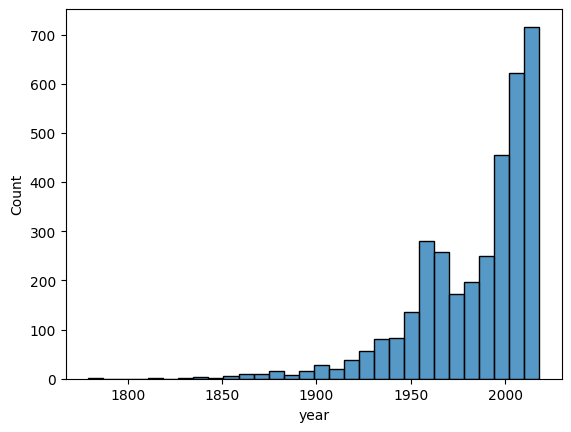

In [231]:
sns.histplot(x=attacks.year, bins=30)

<AxesSubplot:xlabel='year', ylabel='Count'>

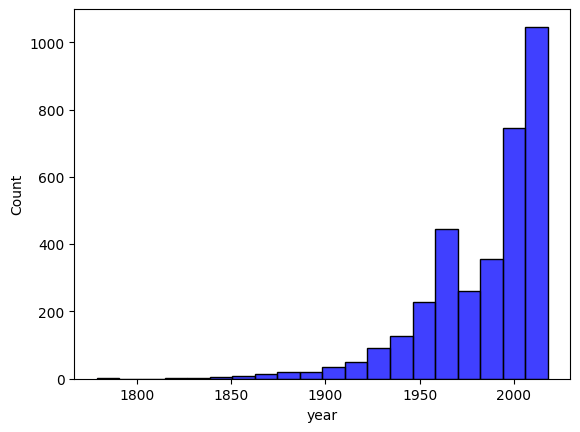

In [238]:
#Removing the data where 'Year'
attacks = attacks.loc[attacks['year'] > 1750,:]
sns.histplot(x=attacks.year, bins=20,color='blue')

In [ ]:
attacks["Type"].value_counts()

In [176]:
info = pd.DataFrame({'Language known': ['Python', 'Android', 'C', 'Android', 'Python', 'C++', 'C']},  
index=['Parker', 'Smith', 'John', 'William', 'Dean', 'Christina', 'Cornelia'])  
print(info)   
dictionary = {"Python": 1, "Android": 2, "C": 3, "Android": 4, "C++": 5}  
info1 = info.replace({"Language known": dictionary})  

          Language known
Parker            Python
Smith            Android
John                   C
William          Android
Dean              Python
Christina            C++
Cornelia               C
